In [2]:
import os
import time
import requests
import sys


def retrieve_html():
    for year in range(2013,2016):
        for month in range(1,13):
            if(month<10):
                url='http://en.tutiempo.net/climate/0{}-{}/ws-421820.html'.format(month
                                                                          ,year)
            else:
                url='http://en.tutiempo.net/climate/{}-{}/ws-421820.html'.format(month
                                                                          ,year)
            texts=requests.get(url)
            text_utf=texts.text.encode('utf=8')
            
            if not os.path.exists("Data/Html_Data/{}".format(year)):
                os.makedirs("Data/Html_Data/{}".format(year))
            with open("Data/Html_Data/{}/{}.html".format(year,month),"wb") as output:
                output.write(text_utf)
            
        sys.stdout.flush()
        
if __name__=="__main__":
    start_time=time.time()
    retrieve_html()
    stop_time=time.time()
    print("Time taken {}".format(stop_time-start_time))

Time taken 97.13584446907043


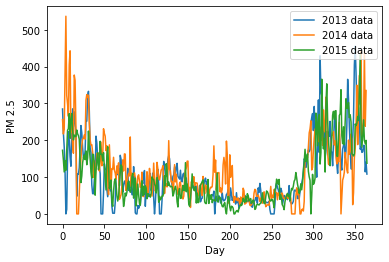

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


def avg_data_2013():
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/AQI/aqi2013.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2014():
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/AQI/aqi2014.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2015():
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/AQI/aqi2015.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average


if __name__=="__main__":
    lst2013=avg_data_2013()
    lst2014=avg_data_2014()
    lst2015=avg_data_2015()

    plt.plot(range(0,365),lst2013,label="2013 data")
    plt.plot(range(0,364),lst2014,label="2014 data")
    plt.plot(range(0,365),lst2015,label="2015 data")

    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.legend(loc='upper right')
    plt.show()

In [7]:
print(len(lst2013))
print(lst2013)

365
[284.79583333333335, 219.72083333333333, 182.1875, 115.28749999999998, 0.0, 12.379166666666668, 154.03750000000002, 223.20833333333334, 200.64583333333337, 154.875, 129.38749999999996, 224.2458333333333, 285.22499999999997, 236.82499999999996, 276.90833333333336, 245.65, 218.67083333333326, 47.82500000000001, 108.0, 107.625, 125.89166666666667, 179.3083333333333, 239.85, 220.1916666666667, 181.01250000000005, 152.55416666666667, 152.32083333333335, 171.42916666666665, 251.375, 251.82916666666668, 319.7375, 332.7083333333333, 279.59999999999997, 179.11666666666667, 166.29999999999998, 78.25416666666666, 54.958333333333336, 54.791666666666664, 93.375, 103.0, 211.125, 192.29166666666666, 152.0, 132.20833333333334, 127.70833333333333, 109.33333333333333, 0.0, 0.0, 0.0, 56.458333333333336, 135.83333333333334, 122.5, 119.33333333333333, 67.125, 46.708333333333336, 69.66666666666667, 79.83333333333333, 62.708333333333336, 81.04166666666667, 21.208333333333332, 1.9166666666666667, 1.833333

In [9]:
import requests
import sys
import pandas as pd
from bs4 import BeautifulSoup
import os
import csv

def met_data(month, year):
    
    file_html = open('Data/Html_Data/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()

    tempD = []
    finalD = []

    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)

    rows = len(tempD) / 15

    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1)
    finalD.pop(0)

    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)

    return finalD

def data_combine(year, cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist


if __name__ == "__main__":
    if not os.path.exists("Data/Real-Data"):
        os.makedirs("Data/Real-Data")
    for year in range(2013, 2016):
        final_data = []
        with open('Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        for month in range(1, 13):
            temp = met_data(month, year)
            final_data = final_data + temp
            
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()

        if len(pm) == 364:
            pm.insert(364, '-')

        for i in range(len(final_data)-1):
            # final[i].insert(0, i + 1)
            final_data[i].insert(8, pm[i])

        with open('Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                if flag != 1:
                    wr.writerow(row)
                    
    data_2013 = data_combine(2013, 600)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    
    total=data_2013+data_2014+data_2015
    
    with open('Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        wr.writerows(total)
        
        
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [10]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
545,12.6,21.0,0.0,1018.9,68.0,1.4,2.6,9.4,264.583333
546,13.7,21.0,5.6,1018.8,71.0,1.3,1.5,7.6,253.291667
547,13.3,19.3,5.5,1021.9,62.0,1.9,7.8,14.8,181.208333
548,14.4,21.5,5.5,1021.0,60.0,1.8,8.9,18.3,210.875000


<AxesSubplot:>

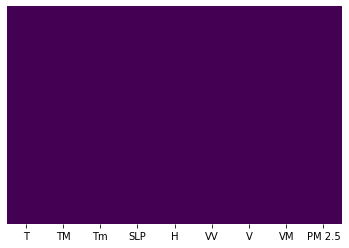

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df=df.dropna()

In [14]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

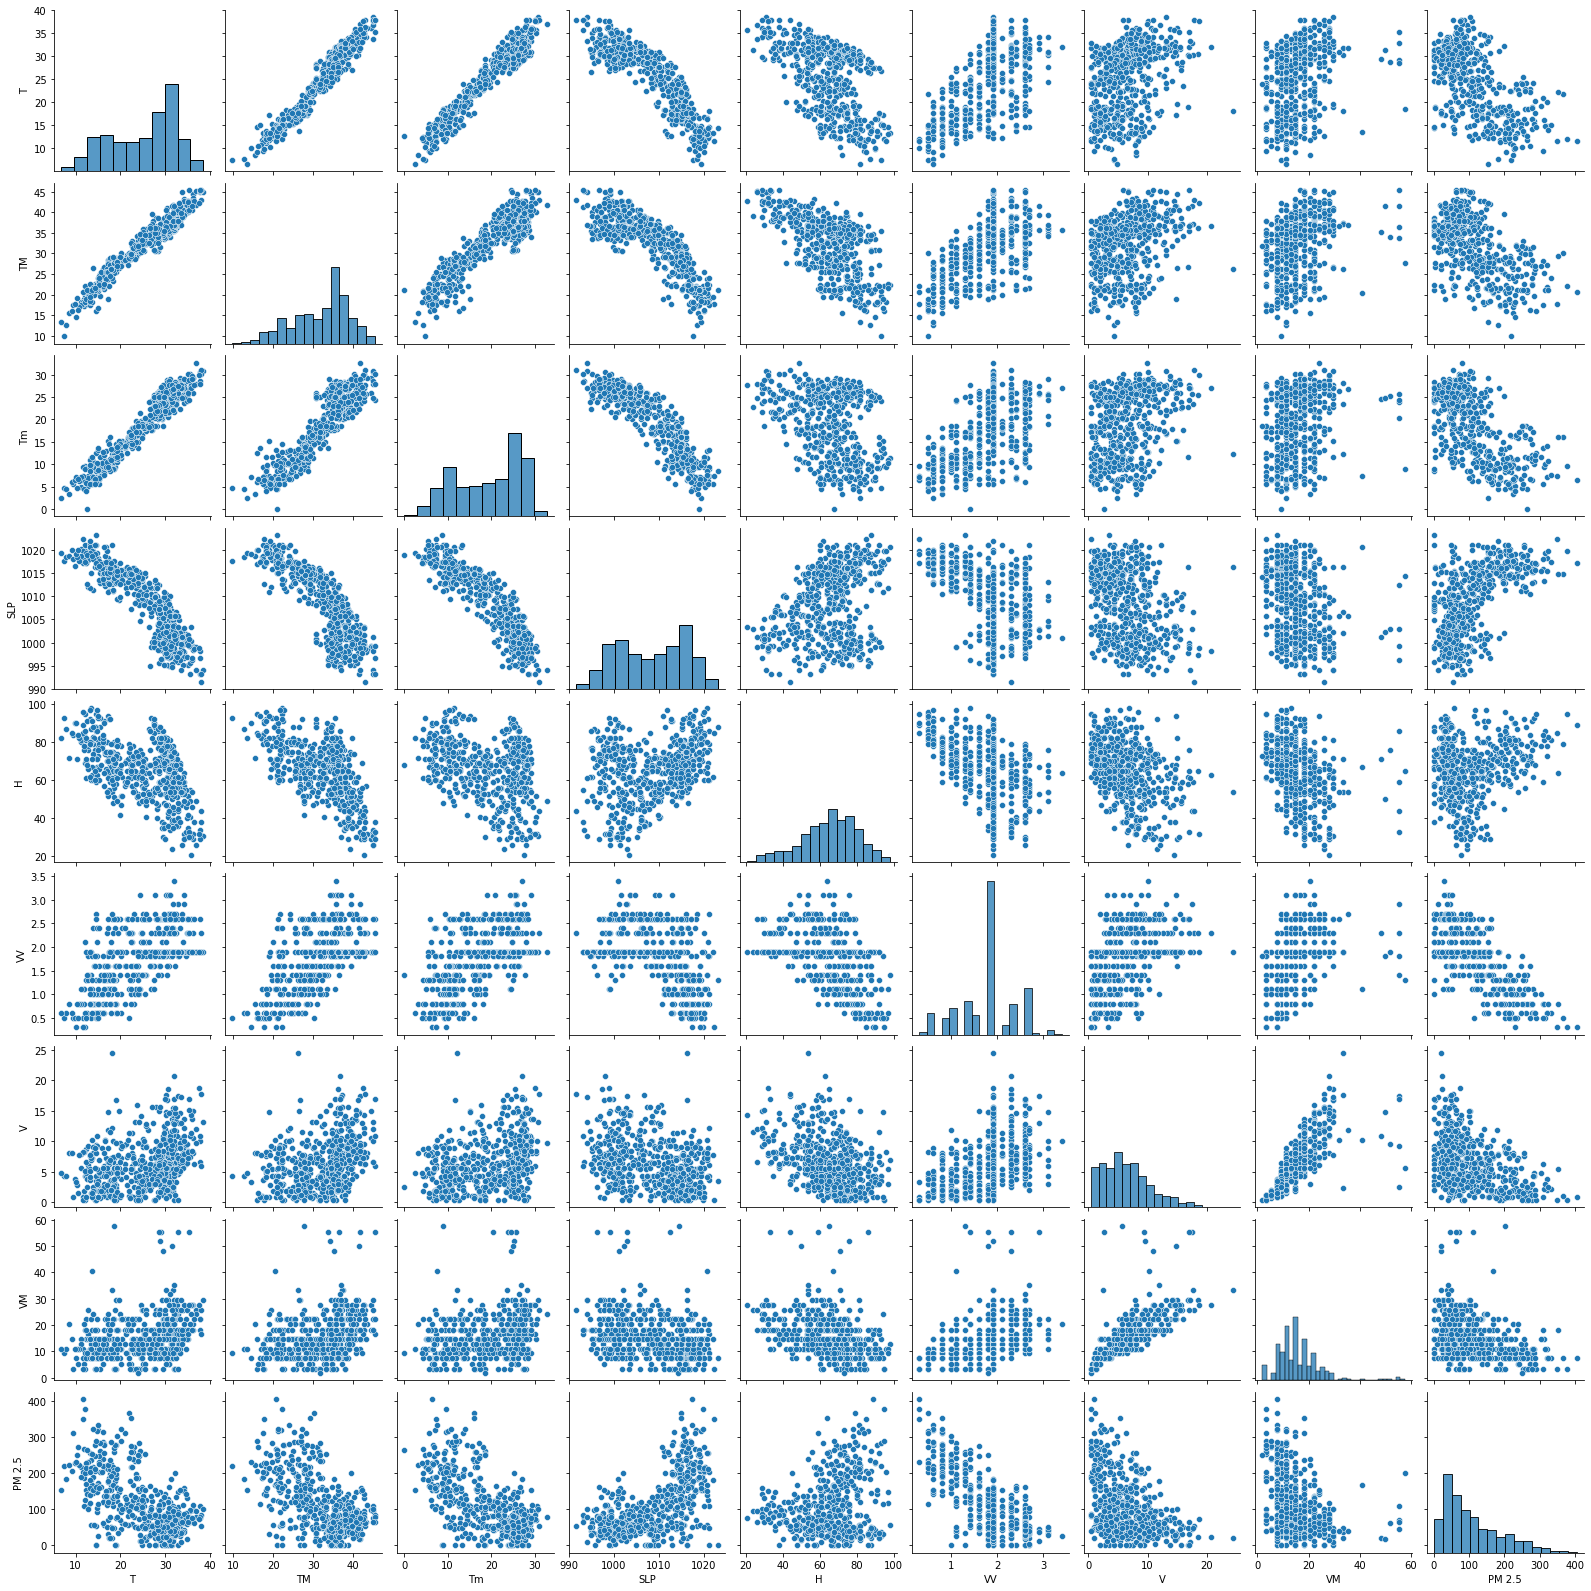

In [15]:
sns.pairplot(df)

In [16]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967862,0.965157,-0.889020,-0.524467,0.608045,0.346485,0.286482,-0.629898
TM,0.967862,1.000000,0.901475,-0.835683,-0.612395,0.605626,0.342980,0.301275,-0.573447
Tm,0.965157,0.901475,1.000000,-0.901673,-0.342549,0.555229,0.327737,0.252748,-0.665778
SLP,-0.889020,-0.835683,-0.901673,1.000000,0.308668,-0.476347,-0.361016,-0.290194,0.608924
H,-0.524467,-0.612395,-0.342549,0.308668,1.000000,-0.480948,-0.416193,-0.380964,0.217851
VV,0.608045,0.605626,0.555229,-0.476347,-0.480948,1.000000,0.443132,0.367184,-0.729767
V,0.346485,0.342980,0.327737,-0.361016,-0.416193,0.443132,1.000000,0.748162,-0.441617
VM,0.286482,0.301275,0.252748,-0.290194,-0.380964,0.367184,0.748162,1.000000,-0.350197
PM 2.5,-0.629898,-0.573447,-0.665778,0.608924,0.217851,-0.729767,-0.441617,-0.350197,1.000000


### Correlation Matrix with Heatmap


In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
print(top_corr_features)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


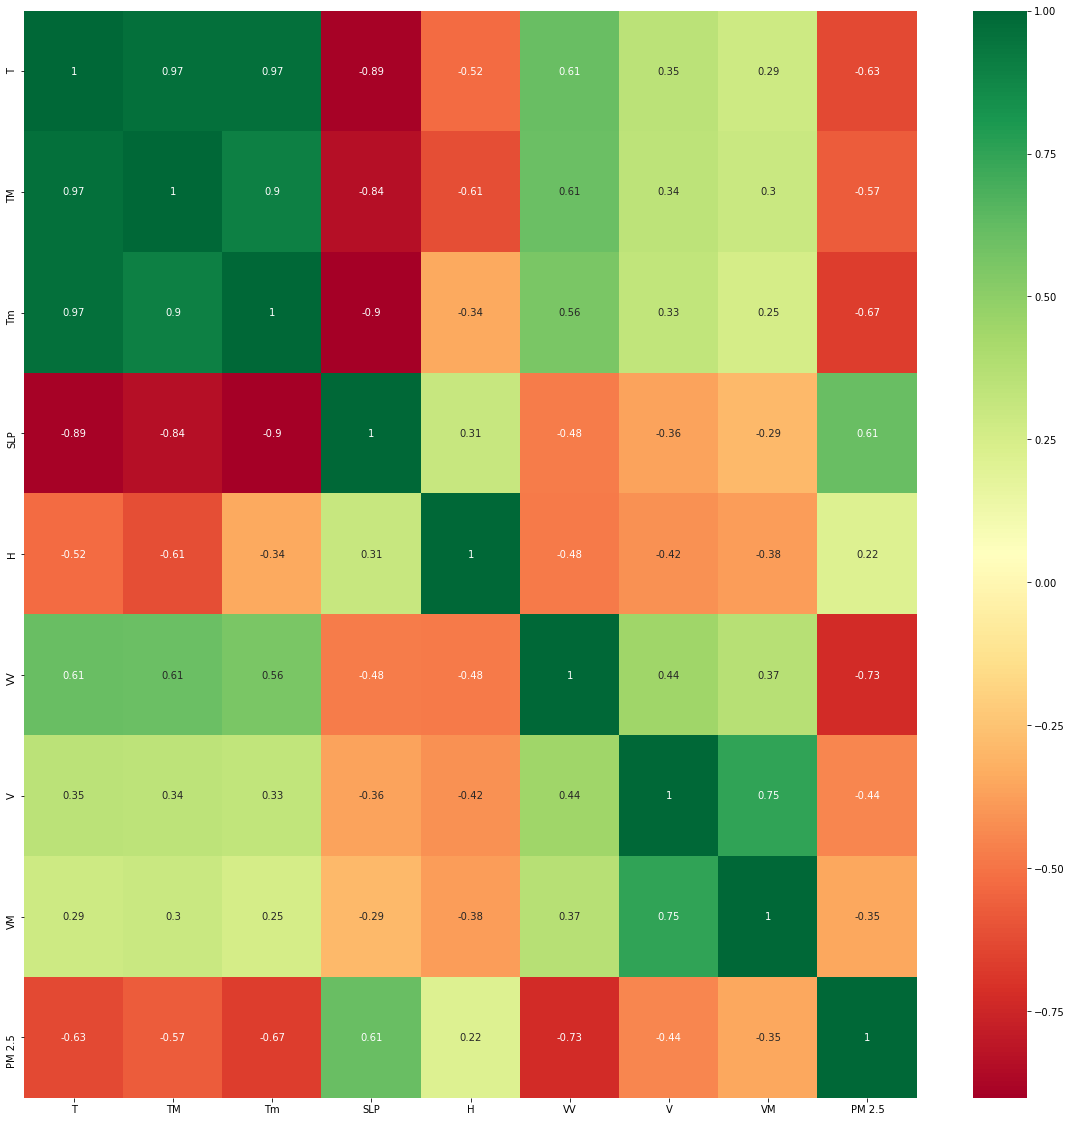

In [19]:
import seaborn as sns

plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.09975577 0.06719478 0.16911028 0.11833661 0.06419236 0.39288199
 0.05031547 0.03821273]


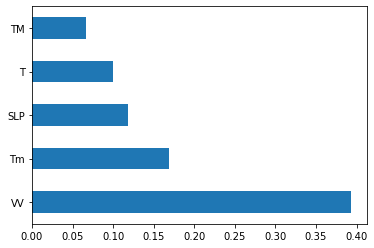

In [22]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.7000922399711959


In [26]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6773177957054347


In [27]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [28]:
score.mean()

0.5047548165055271

In [31]:
prediction=regressor.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 33.36189423994402
MSE: 2044.2488978982956
RMSE: 45.21337078672962


## Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dtree=DecisionTreeRegressor(criterion="squared_error")

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [41]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [42]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.53579815678546


In [44]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

score.mean()

0.1624693259943097

## Tree Visualization

In [47]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [48]:
Target = df.columns[-1]
Target

'PM 2.5'

In [49]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, out_file = None,
                          feature_names=features,
                          class_names=Target)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("Air-Quality_Index.pdf")

True

In [50]:
prediction=dtree.predict(X_test)

In [51]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [52]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [53]:
Decision_Tree = GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [55]:
Decision_Tree.fit(X_train,y_train)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [56]:
Decision_Tree.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [57]:
Decision_Tree.best_score_

-2402.985680305884

In [60]:
predictions=Decision_Tree.predict(X_test)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37.93029728431635
MSE: 2604.9030775358456
RMSE: 51.038251121446606


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7153031662386602


In [68]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [69]:
score.mean()

0.5405834278375778

## Hyperparameter Tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [73]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [75]:
rf_random.best_score_

-1832.4696573740014

In [76]:
predictions=rf_random.predict(X_test)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 30.124984428832942
MSE: 1795.5462420446263
RMSE: 42.373886322175196


# XgBoost Regression

In [80]:
import xgboost as xgb

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [83]:
regressor=xgb.XGBRegressor()

In [84]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.1s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [86]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [87]:
xg_random.best_score_

-1766.4759287680895

In [88]:
predictions=xg_random.predict(X_test)

In [89]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 29.446662359526663
MSE: 1797.3231425703668
RMSE: 42.394848066367295


# Artificial Neural Networks

In [98]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [99]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 0s 11ms/step - loss: 71.3414 - mean_absolute_error: 71.3414 -

26/26 [==============================] - 0s 4ms/step - loss: 36.2981 - mean_absolute_error: 36.2981 - val_loss: 36.1230 - val_mean_absolute_error: 36.1230
Epoch 44/100
26/26 [==============================] - 0s 4ms/step - loss: 39.9978 - mean_absolute_error: 39.9978 - val_loss: 41.3393 - val_mean_absolute_error: 41.3393
Epoch 45/100
26/26 [==============================] - 0s 7ms/step - loss: 35.5332 - mean_absolute_error: 35.5332 - val_loss: 37.2603 - val_mean_absolute_error: 37.2603
Epoch 46/100
26/26 [==============================] - 0s 5ms/step - loss: 35.3401 - mean_absolute_error: 35.3401 - val_loss: 36.2610 - val_mean_absolute_error: 36.2610
Epoch 47/100
26/26 [==============================] - 0s 4ms/step - loss: 37.7821 - mean_absolute_error: 37.7821 - val_loss: 36.4749 - val_mean_absolute_error: 36.4749
Epoch 48/100
26/26 [==============================] - 0s 4ms/step - loss: 37.7745 - mean_absolute_error: 37.7745 - val_loss: 35.8923 - val_mean_absolute_error: 35.8923
Epoch

Epoch 92/100
26/26 [==============================] - 0s 4ms/step - loss: 34.8236 - mean_absolute_error: 34.8236 - val_loss: 40.1738 - val_mean_absolute_error: 40.1738
Epoch 93/100
26/26 [==============================] - 0s 4ms/step - loss: 35.5908 - mean_absolute_error: 35.5908 - val_loss: 36.2779 - val_mean_absolute_error: 36.2779
Epoch 94/100
26/26 [==============================] - 0s 4ms/step - loss: 35.2626 - mean_absolute_error: 35.2626 - val_loss: 41.2481 - val_mean_absolute_error: 41.2481
Epoch 95/100
26/26 [==============================] - 0s 4ms/step - loss: 38.2349 - mean_absolute_error: 38.2349 - val_loss: 38.8560 - val_mean_absolute_error: 38.8560
Epoch 96/100
26/26 [==============================] - 0s 4ms/step - loss: 36.9898 - mean_absolute_error: 36.9898 - val_loss: 36.5030 - val_mean_absolute_error: 36.5030
Epoch 97/100
26/26 [==============================] - 0s 4ms/step - loss: 34.9581 - mean_absolute_error: 34.9581 - val_loss: 34.2561 - val_mean_absolute_error: 

In [100]:
prediction=NN_model.predict(X_test)

In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.33052607989071
MSE: 3625.334926040417
RMSE: 60.21075423909268
